# Decision Tree project to predict whether the Patient has heart disease or not

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import tree
plt.rcParams['figure.figsize'] = (18,6)


Importing the dataset in variable data

In [ ]:
data=pd.read_csv("HeartDisease.csv")



> **Feature: Description**



*   age : Age of the patient  
*   gender : Gender of the patient - (0,1) - (Male, Female)
*   chest_pain : It refers to the chest pain experienced by the patient -(0,1,2,3) 
*    rest_bps : Blood pressure of the patient while resting(in mm/Hg)
*   cholestrol : Patient's cholesterol level (in mg/dl)
*   Fasting_blood_sugar : The blood sugar of the patient while fasting
*   rest_ecg : Potassium level (0,1,2)
*   thalach : The patient’s maximum heart rate
*   exer_angina : It refers to exercise-induced angina - (1=Yes, 0=No)
*   old_peak : It is the ST depression induced by exercise relative to rest
*   Slope : It refers to the slope of the peak of the exercise ST-Segment
*   ca : Number of major vessels
*   thalassemia : It refers to thalassemia which is a blood disorder
*   target : The patient has heart disease or not - (1=Yes, 0=No)



In [ ]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.338870,0.684385,0.973422,131.501661,246.634551,0.149502,0.528239,149.790698,0.325581,1.007309,1.408638,0.724252,2.308970,0.548173
std,9.101545,0.465534,1.032452,17.512971,51.756990,0.357176,0.526023,22.870783,0.469372,1.094507,0.607557,1.016715,0.611735,0.498503
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,4.000000,3.000000,1.000000


Visualizing correlation of features on each other

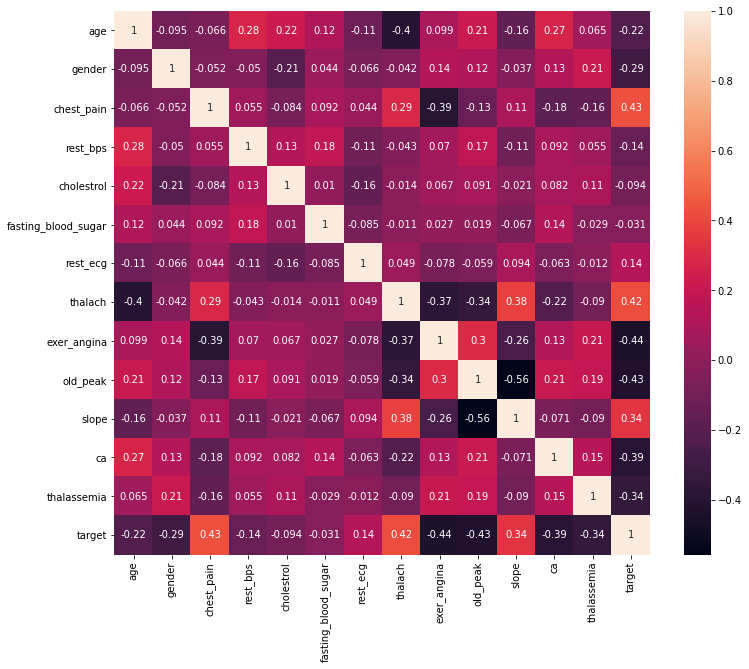

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.show(sns)

Visualizing outiers in the dataset

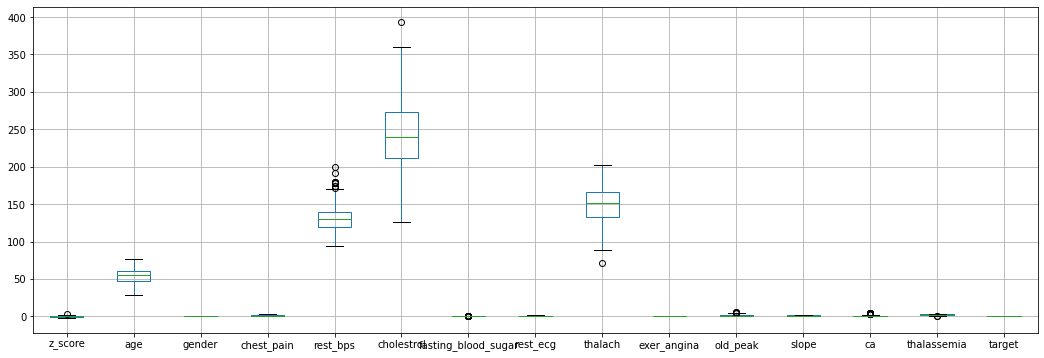

In [13]:
data.boxplot()

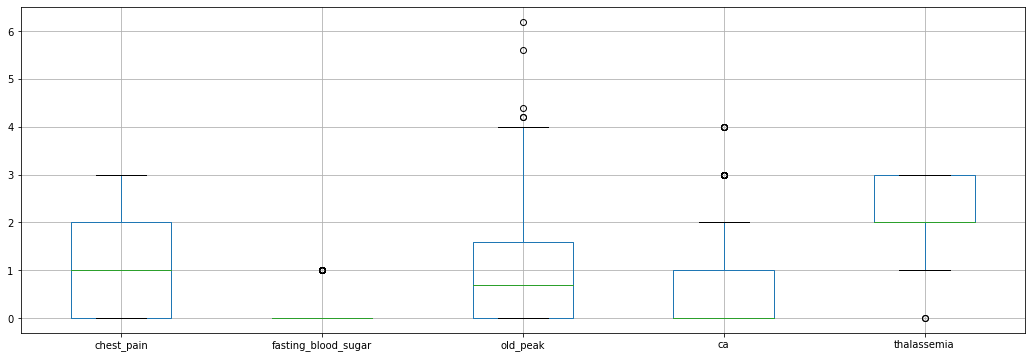

In [15]:
data.boxplot(["chest_pain","fasting_blood_sugar",'old_peak','ca','thalassemia'])

In [29]:
z_score=[]
z_score=stats.zscore(data['cholestrol']) # zscore of cholestrol to eliminate them
z_score=pd.DataFrame(z_score,columns=['z_score'])
data=pd.concat([z_score,data],axis=1)

In [30]:
ind=data[data["z_score"]>3].index
data.drop(ind,axis=0,inplace=True)


In [31]:
data.drop("z_score",axis=1,inplace=True)

Building a decision tree classifier model

In [32]:
dt=DecisionTreeClassifier()
Xtrain,Xtest,Ytrain,Ytest=train_test_split(data.iloc[:,0:-1],data.iloc[:,-1],random_state=14,test_size=0.3)

Decision Tree is showing accuracy of 80%

In [46]:
dt.fit(Xtrain,Ytrain)
predy=dt.predict(Xtest)
accuracy_score(Ytest,predy)

0.8

In [49]:
print(confusion_matrix(Ytest,predy))

[[27 11]
 [ 7 45]]


Plotting the Decison tree model trained from the Dataset

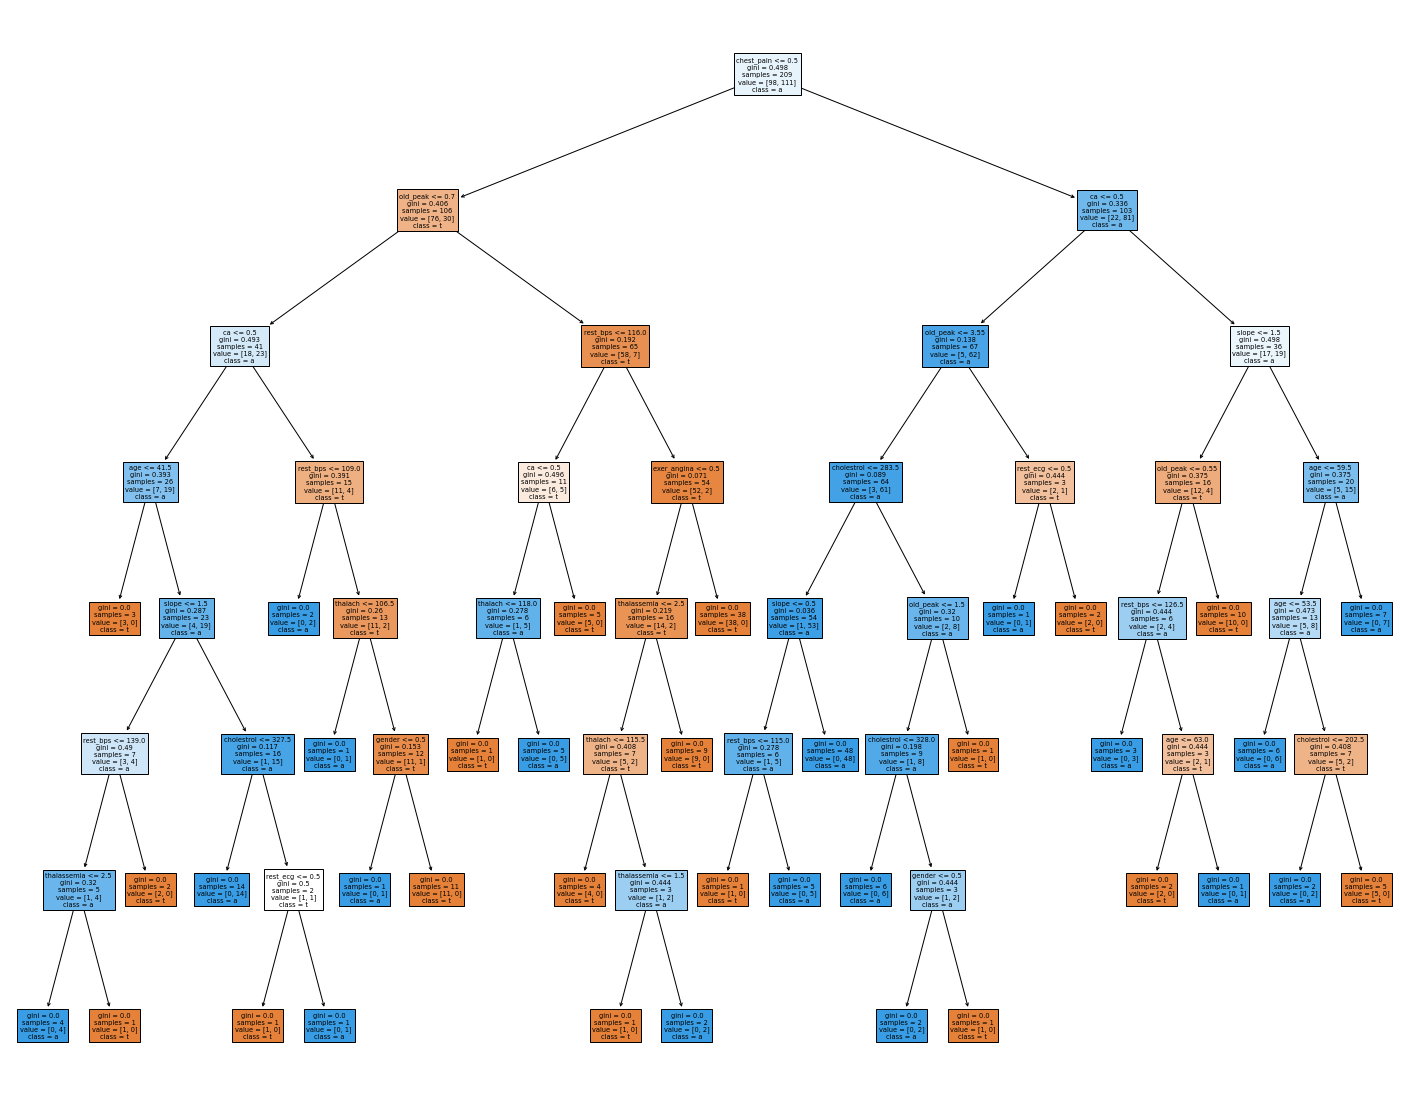

In [41]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(dt,feature_names=data.columns.drop('target'),class_names='target',filled=True)